# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

## Next Steps

1) Extend the Date Range: Analyze seasonal trends by fetching data over several months.
   Specified date range as following:
   # Date range
    start_date = '2022-11-01'
    end_date = '2023-01-08'
   
3) Fetch Additional Variables: Include wind speed, atmospheric pressure, or other interesting variables.
   Specified variables as following:
    hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation','wind_speed_10m', 'pressure_msl', 'visibility']


4) Forecasting: Use statistical methods or machine learning models to forecast future weather patterns.
5) Global Analysis: Compare data from other global cities to gain broader insights.
•	# Location coordinates for Hanover City
•	latitude = 18.3894
•	longitude = -78.1295
•	     'timezone': 'America/New_York'
•	
•	plt.title('Temperature Over Time in Hanover City')
•	plt.title('Relative Humidity Over Time in Hanover City')
•	plt.title('Precipitation Over Time in Hanover City')
•	plt.title('Daily Average Temperature in Hanover City')
•	plt.title('Daily Average Temperature: Hanover vs Los Angeles')
•	    'Hanover': daily_avg['temperature_2m'],
•	# Step 9: Advanced Analysis - Temperature Difference
•	print("Available columns:", combined_temp.columns.tolist())
•	
•	# Calculate Temperature Difference
•	combined_temp['Temp Difference'] = combined_temp['Hanover'] - combined_temp['Los Angeles']
•	combined_temp


      

   

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
!pip install requests pandas matplotlib

In [73]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [89]:
# Step 1: Set Up Parameters

# Location coordinates for Hanover City
latitude = 18.3894
longitude = -78.1295

# Date range
start_date = '2022-11-01'
end_date = '2023-01-08'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation','wind_speed_10m', 'pressure_msl', 'visibility']


In [90]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [91]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [92]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,visibility
0,2022-11-01T00:00,23.0,91,0.0,12.4,1012.0,None
1,2022-11-01T01:00,23.0,90,0.0,11.4,1011.7,None
2,2022-11-01T02:00,22.8,90,0.0,9.0,1011.6,None
3,2022-11-01T03:00,22.7,90,0.0,8.6,1011.1,None
4,2022-11-01T04:00,22.6,91,0.0,8.3,1011.0,None


In [93]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m            0
relativehumidity_2m       0
precipitation             0
wind_speed_10m            0
pressure_msl              0
visibility             1656
dtype: int64

In [94]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\pande\AppData\Local\Temp\ipykernel_2132\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [95]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,23.984964,81.240338,0.078442,8.889976,1014.802899
std,2.885465,12.845358,0.339344,4.157291,2.061022
min,17.700000,48.000000,0.000000,0.000000,1008.400000
25%,21.700000,70.000000,0.000000,5.775000,1013.500000
50%,23.300000,85.000000,0.000000,8.700000,1015.000000
75%,26.700000,92.000000,0.000000,11.125000,1016.200000
max,30.600000,100.000000,7.000000,23.500000,1019.600000


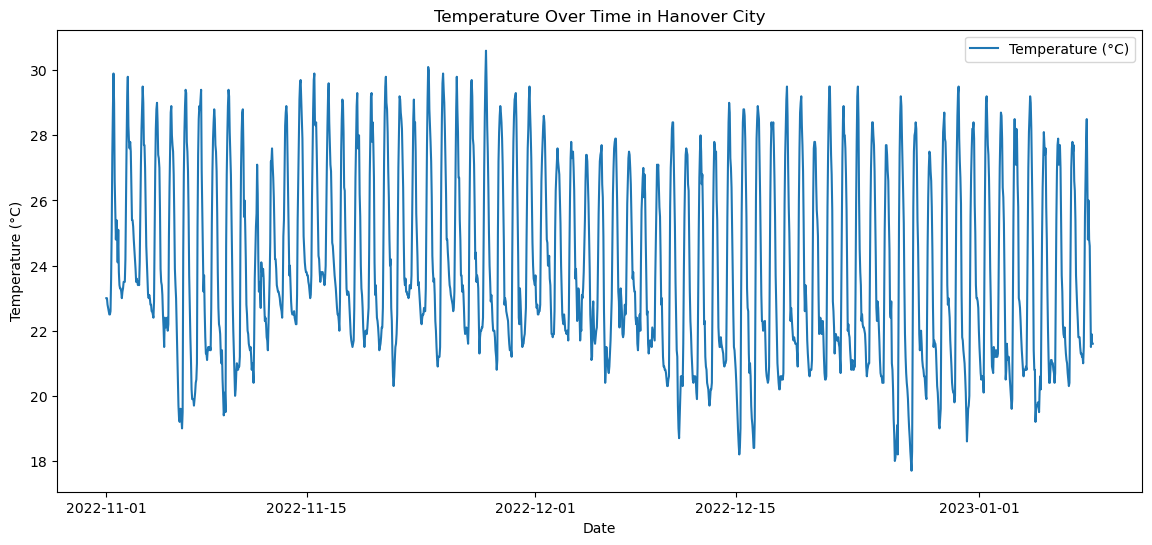

In [96]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in Hanover City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

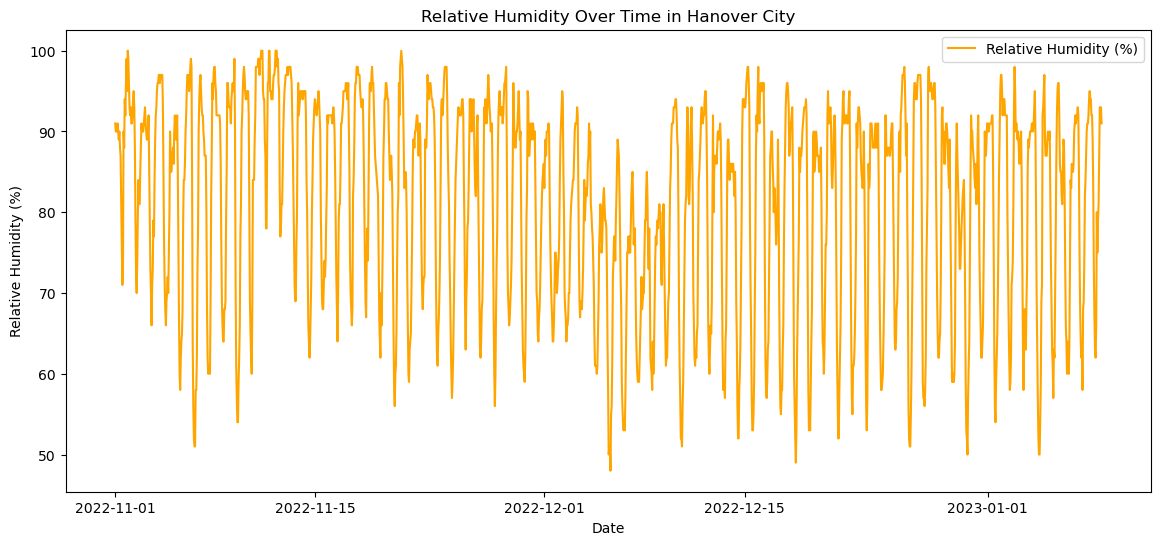

In [97]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in Hanover City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


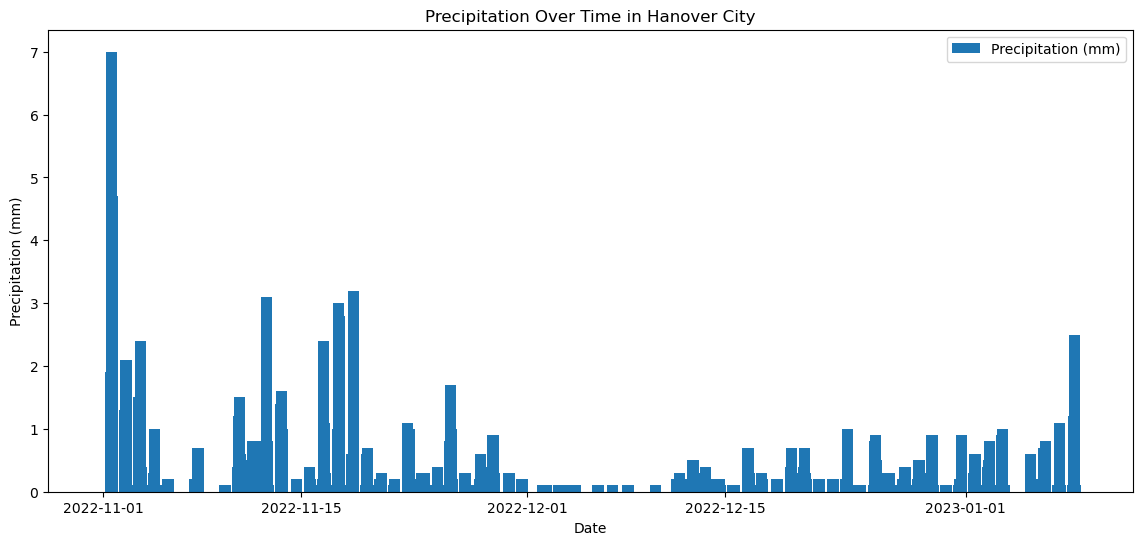

In [98]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in Hanover City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [99]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: -0.83


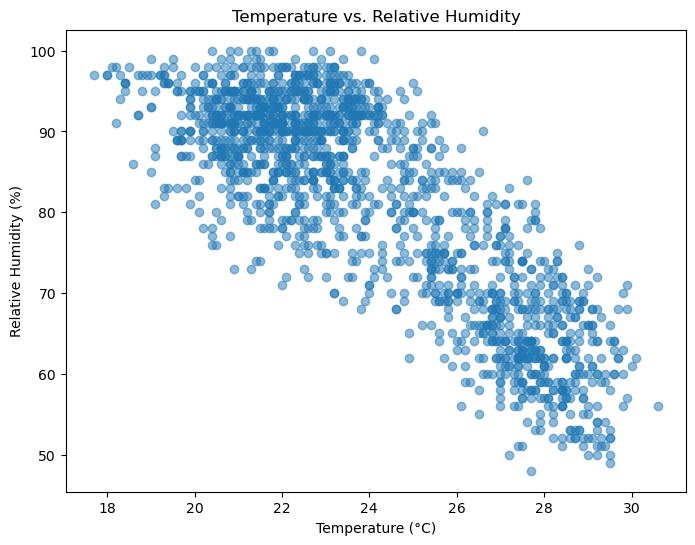

In [100]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [71]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,visibility
time,,,,,,
2022-06-01,18.145833,80.375000,0.366667,12.970833,1013.616667,NaN
2022-06-02,20.708333,85.208333,0.312500,8.804167,1007.316667,NaN
2022-06-03,20.654167,80.250000,0.091667,9.095833,1007.608333,NaN
2022-06-04,20.008333,65.500000,0.000000,10.058333,1011.237500,NaN
2022-06-05,18.550000,54.375000,0.000000,8.133333,1015.200000,NaN


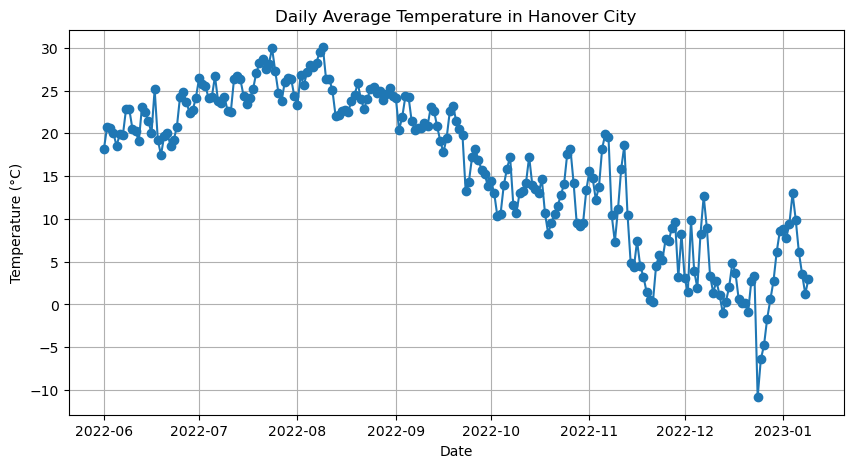

In [101]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in Hanover City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [102]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\pande\AppData\Local\Temp\ipykernel_2132\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [103]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [107]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'Hanover': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


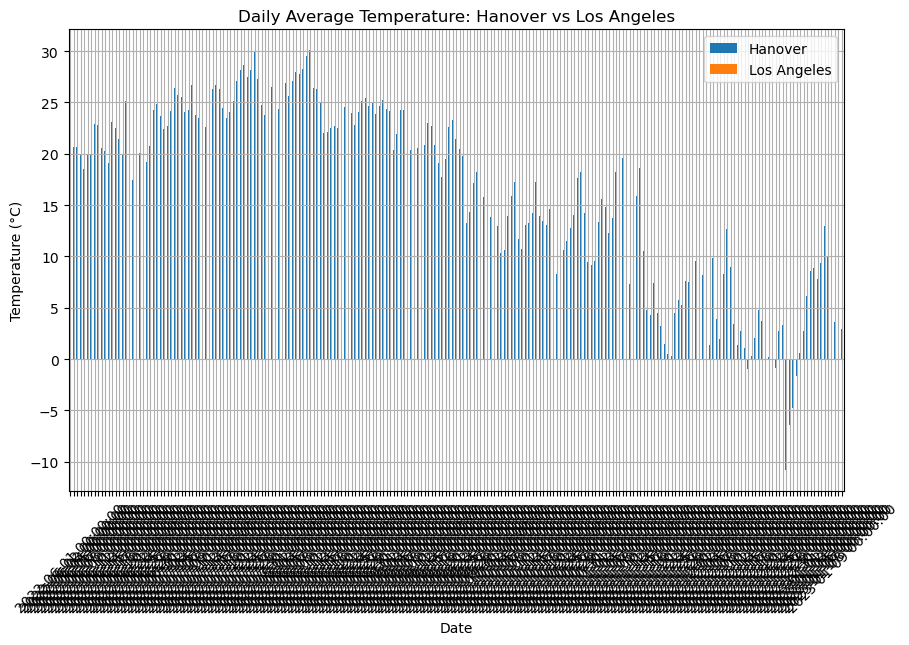

In [108]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: Hanover vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [114]:
# Step 9: Advanced Analysis - Temperature Difference
print("Available columns:", combined_temp.columns.tolist())

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Hanover'] - combined_temp['Los Angeles']
combined_temp


Available columns: ['Hanover', 'Los Angeles']


,Hanover,Los Angeles,Temp Difference
time,,,
2022-06-01,18.145833,NaN,NaN
2022-06-02,20.708333,NaN,NaN
2022-06-03,20.654167,NaN,NaN
2022-06-04,20.008333,NaN,NaN
2022-06-05,18.550000,NaN,NaN
...,...,...,...
2023-01-05,9.916667,12.183333,-2.266667
2023-01-06,6.079167,9.662500,-3.583333
2023-01-07,3.575000,12.095833,-8.520833


In [115]:
# Step 10: Save Data to CSV (Optional)

# Save Hanover data
df.to_csv('hanover_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_new_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **Hanover** and **Los Angeles**.

---

**Next Steps**:

This file is for next steps since used Hanover city and Los Angeles comparison.
